## Part 1- Data Coding and Merging

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import NHL Team Data and Display
NHL_Team=pd.read_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week2\\NHL_team.csv")
NHL_Team.drop(['Unnamed: 0','abbr','tname','lname','sname'], axis=1, inplace=True)
NHL_Team.rename(columns={'name':'team_name'}, inplace=True)
display(NHL_Team)

,tid,team_name,tricode
0,1,Toronto Maple Leafs,TOR
1,2,Montréal Canadiens,MTL
2,4,Winnipeg Jets,WPG
3,5,Washington Capitals,WSH
4,6,Chicago Blackhawks,CHI
5,7,St. Louis Blues,STL
6,8,Pittsburgh Penguins,PIT
7,10,Edmonton Oilers,EDM
8,11,Calgary Flames,CGY
9,14,Philadelphia Flyers,PHI


In [3]:
#Import NHL Competition Data and Display Head
NHL_Competition=pd.read_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week2\\NHL_competition.csv")
NHL_Competition.drop(['Unnamed: 0','tz','start','end'], axis=1, inplace=True)
NHL_Competition.rename(columns={'name':'competition_name'}, inplace=True)
NHL_Competition.head()

,comp_id,year,type,competition_name
0,1,2013,2,2013 NHL Regular Season
1,2,2017,2,2017 NHL Regular Season
2,2453,2013,3,2013 NHL Playoff
3,2541,2017,3,2017 NHL Playoff
4,2661,2012,2,2012 NHL Regular Season


In [4]:
#Import NHL Game Data and Display Head
NHL_Game=pd.read_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week2\\NHL_game.csv")
NHL_Game.drop(['X','period','status'], axis=1, inplace=True)
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid
0,37,2,10/7/2017,NaN,NaN,away,25
1,67,2,10/9/2017,NaN,NaN,away,29
2,154,1,10/14/2013,NaN,NaN,away,29
3,278,1,10/24/2013,NaN,NaN,away,53
4,291,1,10/25/2013,NaN,NaN,away,5


In [5]:
#Import NHL PPPK Data and Display Head
NHL_PPPK=pd.read_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week2\\pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [6]:
# Merge NHL_Team and NHL_Game
NHL_Game=pd.merge(NHL_Team, NHL_Game, on=['tid'])
NHL_Game.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away
0,1,Toronto Maple Leafs,TOR,741,1,11/28/2013,NaN,NaN,away
1,1,Toronto Maple Leafs,TOR,782,1,12/1/2013,NaN,NaN,away
2,1,Toronto Maple Leafs,TOR,5225,5181,4/25/2017,NaN,NaN,away
3,1,Toronto Maple Leafs,TOR,6557,5385,1/7/2016,NaN,NaN,away
4,1,Toronto Maple Leafs,TOR,6914,5385,2/7/2016,NaN,NaN,away


In [7]:
# Merge NHL_Competition and NHL_Game
NHL_Game=pd.merge(NHL_Competition, NHL_Game, on=['comp_id'])
NHL_Game.head()

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away
0,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,741,11/28/2013,NaN,NaN,away
1,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,782,12/1/2013,NaN,NaN,away
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1003,12/17/2013,1.0,3.0,away
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1552,1/26/2014,4.0,5.0,away
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1811,3/2/2014,3.0,4.0,away


In [8]:
NHL_Game['hgd'] = NHL_Game['hscore'] - NHL_Game['ascore']
NHL_Game = NHL_Game[pd.notnull(NHL_Game["hgd"])]
NHL_Game

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away,hgd
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1003,12/17/2013,1.0,3.0,away,2.0
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1552,1/26/2014,4.0,5.0,away,1.0
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1811,3/2/2014,3.0,4.0,away,1.0
5,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1940,3/11/2014,3.0,1.0,away,-2.0
6,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1522,1/24/2014,1.0,7.0,away,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18941,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9431,4/26/2015,4.0,7.0,away,3.0
18942,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9428,4/20/2015,2.0,4.0,away,2.0
18943,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9430,4/24/2015,1.0,2.0,home,1.0
18944,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9426,4/16/2015,2.0,1.0,home,-1.0


In [9]:
NHL_Game.info

<bound method DataFrame.info of        comp_id  year  type         competition_name  tid            team_name  \
2            1  2013     2  2013 NHL Regular Season    1  Toronto Maple Leafs   
3            1  2013     2  2013 NHL Regular Season    1  Toronto Maple Leafs   
4            1  2013     2  2013 NHL Regular Season    1  Toronto Maple Leafs   
5            1  2013     2  2013 NHL Regular Season    1  Toronto Maple Leafs   
6            1  2013     2  2013 NHL Regular Season    1  Toronto Maple Leafs   
...        ...   ...   ...                      ...  ...                  ...   
18941     9389  2014     3         2014 NHL Playoff   53    Vancouver Canucks   
18942     9389  2014     3         2014 NHL Playoff   53    Vancouver Canucks   
18943     9389  2014     3         2014 NHL Playoff   53    Vancouver Canucks   
18944     9389  2014     3         2014 NHL Playoff   53    Vancouver Canucks   
18945     9389  2014     3         2014 NHL Playoff   53    Vancouver Canucks

In [10]:
import datetime
NHL_Game['date']=pd.to_datetime(NHL_Game['date'])
NHL_Game

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away,hgd
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1003,2013-12-17,1.0,3.0,away,2.0
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1552,2014-01-26,4.0,5.0,away,1.0
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1811,2014-03-02,3.0,4.0,away,1.0
5,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1940,2014-03-11,3.0,1.0,away,-2.0
6,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1522,2014-01-24,1.0,7.0,away,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18941,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9431,2015-04-26,4.0,7.0,away,3.0
18942,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9428,2015-04-20,2.0,4.0,away,2.0
18943,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9430,2015-04-24,1.0,2.0,home,1.0
18944,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9426,2015-04-16,2.0,1.0,home,-1.0


In [11]:
NHL_Game.sort_values(['date'], inplace=True)
NHL_Game.head(15)

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away,hgd
15183,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,3.0,home,-1.0
14163,5662,2010,2,2010 NHL Regular Season,14,Philadelphia Flyers,PHI,5664,2010-10-07,3.0,2.0,away,-1.0
15794,5662,2010,2,2010 NHL Regular Season,66,Carolina Hurricanes,CAR,5666,2010-10-07,4.0,3.0,away,-1.0
13955,5662,2010,2,2010 NHL Regular Season,8,Pittsburgh Penguins,PIT,5664,2010-10-07,3.0,2.0,home,-1.0
13611,5662,2010,2,2010 NHL Regular Season,2,Montréal Canadiens,MTL,5662,2010-10-07,2.0,3.0,away,1.0
13564,5662,2010,2,2010 NHL Regular Season,1,Toronto Maple Leafs,TOR,5662,2010-10-07,2.0,3.0,home,1.0
14796,5662,2010,2,2010 NHL Regular Season,22,Colorado Avalanche,COL,5668,2010-10-08,3.0,4.0,home,1.0
15675,5662,2010,2,2010 NHL Regular Season,52,Columbus Blue Jackets,CBJ,5672,2010-10-08,3.0,2.0,home,-1.0
14664,5662,2010,2,2010 NHL Regular Season,21,Anaheim Ducks,ANA,5679,2010-10-08,0.0,4.0,away,4.0
13672,5662,2010,2,2010 NHL Regular Season,5,Washington Capitals,WSH,5683,2010-10-08,2.0,4.0,away,2.0


In [12]:
NHL_Home = NHL_Game[NHL_Game.home_away == 'home']
NHL_Home.rename(columns={'hscore':'goals_for','ascore':'goals_against'}, inplace=True)
NHL_Home['win'] = np.where(NHL_Home['goals_for'] > NHL_Home['goals_against'], 1, 0)
NHL_Home['win'] = np.where(NHL_Home['goals_for'] == NHL_Home['goals_against'], 0.5, NHL_Home['win'])
NHL_Home 

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_14472\3129158450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Home.rename(columns={'hscore':'goals_for','ascore':'goals_against'}, inplace=True)
C:\Users\mgy0003\AppData\Local\Temp\ipykernel_14472\3129158450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Home['win'] = np.where(NHL_Home['goals_for'] > NHL_Home['goals_against'], 1, 0)
C:\Users\mgy0003\AppData\Local\Temp\ipykernel_14472\3129158450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_against,goals_for,home_away,hgd,win
15183,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,3.0,home,-1.0,0.0
13955,5662,2010,2,2010 NHL Regular Season,8,Pittsburgh Penguins,PIT,5664,2010-10-07,3.0,2.0,home,-1.0,0.0
13564,5662,2010,2,2010 NHL Regular Season,1,Toronto Maple Leafs,TOR,5662,2010-10-07,2.0,3.0,home,1.0,1.0
14796,5662,2010,2,2010 NHL Regular Season,22,Colorado Avalanche,COL,5668,2010-10-08,3.0,4.0,home,1.0,1.0
15675,5662,2010,2,2010 NHL Regular Season,52,Columbus Blue Jackets,CBJ,5672,2010-10-08,3.0,2.0,home,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2720,2018-05-29,4.0,6.0,home,2.0,1.0
5384,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2723,2018-05-31,3.0,2.0,home,-1.0,0.0
5229,2541,2017,3,2017 NHL Playoff,5,Washington Capitals,WSH,2725,2018-06-03,1.0,3.0,home,2.0,1.0
5228,2541,2017,3,2017 NHL Playoff,5,Washington Capitals,WSH,2727,2018-06-05,2.0,6.0,home,4.0,1.0


In [13]:
NHL_Away = NHL_Game[NHL_Game.home_away == 'away']
NHL_Away.rename(columns={'ascore':'goals_for','hscore':'goals_against'}, inplace=True)
NHL_Away['win'] = np.where(NHL_Away['goals_for'] > NHL_Away['goals_against'], 1, 0)
NHL_Away['win'] = np.where(NHL_Away['goals_for'] == NHL_Away['goals_against'], 0.5, NHL_Away['win'])
NHL_Away 

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_14472\4276186255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Away.rename(columns={'ascore':'goals_for','hscore':'goals_against'}, inplace=True)
C:\Users\mgy0003\AppData\Local\Temp\ipykernel_14472\4276186255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Away['win'] = np.where(NHL_Away['goals_for'] > NHL_Away['goals_against'], 1, 0)
C:\Users\mgy0003\AppData\Local\Temp\ipykernel_14472\4276186255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_for,goals_against,home_away,hgd,win
14163,5662,2010,2,2010 NHL Regular Season,14,Philadelphia Flyers,PHI,5664,2010-10-07,3.0,2.0,away,-1.0,1.0
15794,5662,2010,2,2010 NHL Regular Season,66,Carolina Hurricanes,CAR,5666,2010-10-07,4.0,3.0,away,-1.0,1.0
13611,5662,2010,2,2010 NHL Regular Season,2,Montréal Canadiens,MTL,5662,2010-10-07,2.0,3.0,away,1.0,0.0
14664,5662,2010,2,2010 NHL Regular Season,21,Anaheim Ducks,ANA,5679,2010-10-08,0.0,4.0,away,4.0,0.0
13672,5662,2010,2,2010 NHL Regular Season,5,Washington Capitals,WSH,5683,2010-10-08,2.0,4.0,away,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,2541,2017,3,2017 NHL Playoff,5,Washington Capitals,WSH,2720,2018-05-29,4.0,6.0,away,2.0,0.0
5214,2541,2017,3,2017 NHL Playoff,5,Washington Capitals,WSH,2723,2018-05-31,3.0,2.0,away,-1.0,1.0
5369,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2725,2018-06-03,1.0,3.0,away,2.0,0.0
5367,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2727,2018-06-05,2.0,6.0,away,4.0,0.0


In [14]:
NHL_Game = pd.concat([NHL_Home, NHL_Away])
NHL_Game.head(15)

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_against,goals_for,home_away,hgd,win
15183,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,3.0,home,-1.0,0.0
13955,5662,2010,2,2010 NHL Regular Season,8,Pittsburgh Penguins,PIT,5664,2010-10-07,3.0,2.0,home,-1.0,0.0
13564,5662,2010,2,2010 NHL Regular Season,1,Toronto Maple Leafs,TOR,5662,2010-10-07,2.0,3.0,home,1.0,1.0
14796,5662,2010,2,2010 NHL Regular Season,22,Colorado Avalanche,COL,5668,2010-10-08,3.0,4.0,home,1.0,1.0
15675,5662,2010,2,2010 NHL Regular Season,52,Columbus Blue Jackets,CBJ,5672,2010-10-08,3.0,2.0,home,-1.0,0.0
15112,5662,2010,2,2010 NHL Regular Season,32,Ottawa Senators,OTT,5681,2010-10-08,2.0,1.0,home,-1.0,0.0
14056,5662,2010,2,2010 NHL Regular Season,10,Edmonton Oilers,EDM,5670,2010-10-08,0.0,4.0,home,4.0,1.0
14460,5662,2010,2,2010 NHL Regular Season,18,Detroit Red Wings,DET,5679,2010-10-08,0.0,4.0,home,4.0,1.0
15015,5662,2010,2,2010 NHL Regular Season,29,New Jersey Devils,NJD,5674,2010-10-08,4.0,3.0,home,-1.0,0.0
15843,5662,2010,2,2010 NHL Regular Season,66,Carolina Hurricanes,CAR,5677,2010-10-08,1.0,2.0,home,1.0,1.0


In [15]:
NHL_Team_Stats = NHL_Game.groupby(['tid', 'competition_name','type'])['win','goals_for','goals_against'].sum()
NHL_Team_Stats = NHL_Team_Stats.reset_index()
display(NHL_Team_Stats)

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_14472\1597156003.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NHL_Team_Stats = NHL_Game.groupby(['tid', 'competition_name','type'])['win','goals_for','goals_against'].sum()


,tid,competition_name,type,win,goals_for,goals_against
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0
2,1,2012 NHL Playoff,3,3.0,18.0,22.0
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0
...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0


In [16]:
NHL_Game_Count = NHL_Game.groupby(['tid','competition_name','type']).size().reset_index(name='game_count')
NHL_Game_Count

,tid,competition_name,type,game_count
0,1,2010 NHL Regular Season,2,82
1,1,2011 NHL Regular Season,2,40
2,1,2012 NHL Playoff,3,7
3,1,2012 NHL Regular Season,2,46
4,1,2013 NHL Regular Season,2,79
...,...,...,...,...
364,66,2014 NHL Regular Season,2,82
365,66,2015 NHL Regular Season,2,81
366,66,2016 NHL Regular Season,2,82
367,66,2017 NHL Regular Season,2,80


In [17]:
NHL_Team_Stats = pd.merge(NHL_Team_Stats, NHL_Game_Count, on=['tid', 'competition_name','type'])
NHL_Team_Stats = pd.merge(NHL_Team_Stats, NHL_Team, on=['tid'])
NHL_Team_Stats


,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR
...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0,82,Carolina Hurricanes,CAR
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0,81,Carolina Hurricanes,CAR
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0,82,Carolina Hurricanes,CAR
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0,80,Carolina Hurricanes,CAR


In [18]:
NHL_Team_Stats = pd.merge(NHL_Team_Stats, NHL_PPPK, on=['tricode','competition_name'])
NHL_Team_Stats

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR,30,29,5.0
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR,234,230,39.0
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR,362,342,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0,82,Carolina Hurricanes,CAR,239,289,55.0
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0,81,Carolina Hurricanes,CAR,247,281,48.0
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0,82,Carolina Hurricanes,CAR,224,258,57.0
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0,80,Carolina Hurricanes,CAR,218,255,51.0


In [19]:
NHL_Team_Stats['win_pct'] = NHL_Team_Stats['win']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_gf'] = NHL_Team_Stats['goals_for'].sum()/NHL_Team_Stats['game_count'].sum()
NHL_Team_Stats['avg_ga'] = NHL_Team_Stats['goals_against'].sum()/NHL_Team_Stats['game_count'].sum()
NHL_Team_Stats


,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.825894,2.825894
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0,0.500000,2.825894,2.825894
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR,30,29,5.0,0.428571,2.825894,2.825894
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR,234,230,39.0,0.543478,2.825894,2.825894
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.825894,2.825894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0,82,Carolina Hurricanes,CAR,239,289,55.0,0.365854,2.825894,2.825894
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0,81,Carolina Hurricanes,CAR,247,281,48.0,0.419753,2.825894,2.825894
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0,82,Carolina Hurricanes,CAR,224,258,57.0,0.432927,2.825894,2.825894
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0,80,Carolina Hurricanes,CAR,218,255,51.0,0.443750,2.825894,2.825894


In [20]:
NHL_Team_R_Stats = NHL_Team_Stats[NHL_Team_Stats.type == 2]
NHL_Team_R_Stats

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.825894,2.825894
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0,0.500000,2.825894,2.825894
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR,234,230,39.0,0.543478,2.825894,2.825894
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.825894,2.825894
5,1,2014 NHL Regular Season,2,29.0,209.0,258.0,78,Toronto Maple Leafs,TOR,319,343,54.0,0.371795,2.825894,2.825894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0,82,Carolina Hurricanes,CAR,239,289,55.0,0.365854,2.825894,2.825894
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0,81,Carolina Hurricanes,CAR,247,281,48.0,0.419753,2.825894,2.825894
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0,82,Carolina Hurricanes,CAR,224,258,57.0,0.432927,2.825894,2.825894
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0,80,Carolina Hurricanes,CAR,218,255,51.0,0.443750,2.825894,2.825894


## Part 2 - Descriptive and Summary Analyses

In [21]:
NHL_Game['goals_for'].describe()

count    18506.000000
mean         2.825894
std          1.654729
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: goals_for, dtype: float64

In [22]:
GA_Home = NHL_Game[NHL_Game.home_away == 'home']
GA_Home.rename(columns={'goals_against':'ga_home'}, inplace=True)
GA_Home['ga_home'].describe()

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_14472\318639550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GA_Home.rename(columns={'goals_against':'ga_home'}, inplace=True)


count    9253.000000
mean        2.689830
std         1.608916
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: ga_home, dtype: float64

In [23]:
GA_Away = NHL_Game[NHL_Game.home_away == 'away']
GA_Away.rename(columns={'goals_against':'ga_away'}, inplace=True)
GA_Away['ga_away'].describe()

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_14472\3305582737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GA_Away.rename(columns={'goals_against':'ga_away'}, inplace=True)


count    9253.000000
mean        2.961958
std         1.688463
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: ga_away, dtype: float64

In [24]:
GA = pd.merge(GA_Home, GA_Away, on=['tid'])
GA

,comp_id_x,year_x,type_x,competition_name_x,tid,team_name_x,tricode_x,gid_x,date_x,ga_home,...,competition_name_y,team_name_y,tricode_y,gid_y,date_y,ga_away,goals_for_y,home_away_y,hgd_y,win_y
0,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,...,2010 NHL Regular Season,Minnesota Wild,MIN,5677,2010-10-08,2.0,1.0,away,1.0,0.0
1,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,...,2010 NHL Regular Season,Minnesota Wild,MIN,5841,2010-10-22,2.0,4.0,away,-2.0,1.0
2,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,...,2010 NHL Regular Season,Minnesota Wild,MIN,5853,2010-10-23,5.0,1.0,away,4.0,0.0
3,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,...,2010 NHL Regular Season,Minnesota Wild,MIN,6052,2010-11-06,2.0,3.0,away,-1.0,1.0
4,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,...,2010 NHL Regular Season,Minnesota Wild,MIN,6105,2010-11-12,5.0,1.0,away,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769708,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2730,2018-06-08,4.0,...,2017 NHL Playoff,Vegas Golden Knights,VGK,2707,2018-05-12,4.0,2.0,away,2.0,0.0
2769709,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2730,2018-06-08,4.0,...,2017 NHL Playoff,Vegas Golden Knights,VGK,2709,2018-05-15,1.0,3.0,away,-2.0,1.0
2769710,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2730,2018-06-08,4.0,...,2017 NHL Playoff,Vegas Golden Knights,VGK,2716,2018-05-20,1.0,2.0,away,-1.0,1.0
2769711,2541,2017,3,2017 NHL Playoff,59,Vegas Golden Knights,VGK,2730,2018-06-08,4.0,...,2017 NHL Playoff,Vegas Golden Knights,VGK,2725,2018-06-03,3.0,1.0,away,2.0,0.0


array([<AxesSubplot:title={'center':'away'}>,
       <AxesSubplot:title={'center':'home'}>], dtype=object)

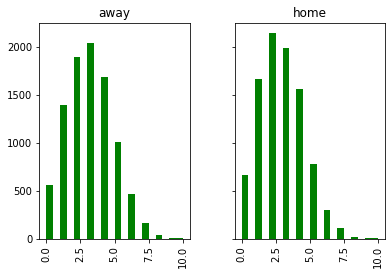

In [25]:
NHL_Game.hist(by='home_away', column='goals_against', color='green', bins=20, sharex=True, sharey=True)

## Part 3 - Correlation Analyses


Text(0.5, 1.0, 'Relationship between Win Percentage and Goals Scored')

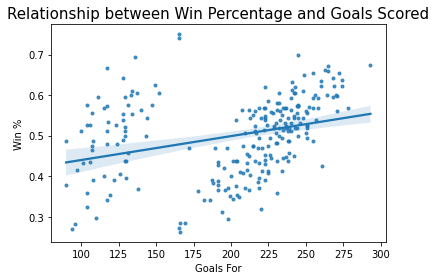

In [28]:
sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.xlabel('Goals For')
plt.ylabel('Win %')
plt.title("Relationship between Win Percentage and Goals Scored", fontsize=15)

## Uncomment this Section once your assignment is complete

In [29]:
NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])

0.31566456280848154

Text(0.5, 1.0, 'Relationship between Win Percentage and Goals Scored')

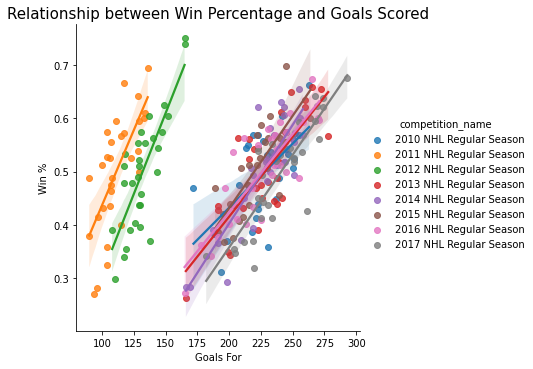

In [32]:
sns.lmplot(x='goals_for', y='win_pct', hue='competition_name', data=NHL_Team_R_Stats)
plt.xlabel('Goals For')
plt.ylabel('Win %')
plt.title("Relationship between Win Percentage and Goals Scored", fontsize=15)

In [36]:
NHL_Team_R_Stats = NHL_Team_R_Stats[NHL_Team_R_Stats.competition_name != '2011 NHL Regular Season']
NHL_Team_R_Stats = NHL_Team_R_Stats[NHL_Team_R_Stats.competition_name != '2012 NHL Regular Season']
NHL_Team_R_Stats

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.825894,2.825894
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.825894,2.825894
5,1,2014 NHL Regular Season,2,29.0,209.0,258.0,78,Toronto Maple Leafs,TOR,319,343,54.0,0.371795,2.825894,2.825894
6,1,2015 NHL Regular Season,2,29.0,196.0,238.0,79,Toronto Maple Leafs,TOR,324,307,27.0,0.367089,2.825894,2.825894
8,1,2016 NHL Regular Season,2,40.0,255.0,246.0,82,Toronto Maple Leafs,TOR,321,321,69.0,0.487805,2.825894,2.825894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,191.0,228.0,82,Carolina Hurricanes,CAR,239,289,55.0,0.365854,2.825894,2.825894
365,66,2015 NHL Regular Season,2,34.0,195.0,226.0,81,Carolina Hurricanes,CAR,247,281,48.0,0.419753,2.825894,2.825894
366,66,2016 NHL Regular Season,2,35.5,219.0,243.0,82,Carolina Hurricanes,CAR,224,258,57.0,0.432927,2.825894,2.825894
367,66,2017 NHL Regular Season,2,35.5,227.0,248.0,80,Carolina Hurricanes,CAR,218,255,51.0,0.443750,2.825894,2.825894


Text(0.5, 1.0, 'Relationship between Win Percentage and Goals Scored')

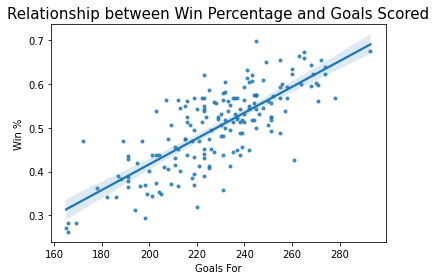

In [37]:
sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.xlabel('Goals For')
plt.ylabel('Win %')
plt.title("Relationship between Win Percentage and Goals Scored", fontsize=15)

In [38]:
NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])

0.7706255321801441

In [41]:
#Save Dataframes as .csv files
NHL_Game.to_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week2\\NHL_Game2.csv", index=False)
NHL_Team_Stats.to_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week2\\NHL_Team_Stats.csv", index=False)
NHL_Team_R_Stats.to_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week2\\NHL_Team_R_Stats.csv", index=False)